In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
import joblib


In [2]:
path = kagglehub.dataset_download("sulianova/cardiovascular-disease-dataset")
csv_path = os.path.join(path, "cardio_train.csv")
df = pd.read_csv(csv_path, delimiter=";")

In [3]:
df['age'] = np.ceil(df['age'] / 365.25)

In [4]:
df['bmi'] = df['weight'] / ((df['height']/100)**2) 

# Cardiovascular Disease (CVD)

##  Definition
Cardiovascular disease refers to a group of disorders that **affect the heart and blood vessels**.

It includes conditions such as:
- **Coronary artery disease (CAD)** → blockages in heart arteries
- **Heart attack (myocardial infarction)**
- **Stroke** → blocked or burst blood vessels in the brain
- **High blood pressure (hypertension)**
- **Heart failure** → heart can’t pump blood effectively
- **Arrhythmia** → abnormal heart rhythm

## Causes / Risk Factors
- **Age** → risk increases with age
- **High blood pressure** → damages arteries
- **High cholesterol** → plaque buildup
- **Diabetes / high blood sugar**
- **Obesity / high BMI**
- **Smoking & alcohol consumption**
- **Physical inactivity**
- **Genetics / family history**

## Symptoms
- Chest pain or discomfort
- Shortness of breath
- Fatigue
- Palpitations
- Swelling in legs, ankles

> Some people may have **no symptoms** until a heart attack or stroke occurs.

## Prevention
- Healthy diet (low salt, low sugar, more fruits/vegetables)
- Regular exercise
- Maintain healthy weight & BMI
- Don’t smoke, limit alcohol
- Regular health checkups (BP, cholesterol, blood sugar)


<h3>1. Systolic Blood Pressure (ap_hi)</h3>
It measures the pressure in the arteries when the heart contracts (pumps blood). <br/>
Healthy Range<br/>
Normal: 90–120<br/>
High: > 140 (Hypertension)<br/>
<h3>2. Diastolic Blood Pressure (ap_lo)</h3>
It measures the pressure in the arteries when the heart relaxes between beats. <br/>
Healthy Range<br/>
Normal: 60–80<br/>
High: > 90<br/>
<h3>pulse_pressure</h3>
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo'] <br/>
High Pressure Higher Risk


In [5]:
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']
df['high_bp'] = ((df['ap_hi'] > 140) | (df['ap_lo'] > 90)).astype(int) 

In [6]:
print("min:", df["ap_hi"].min())
print("max:", df["ap_hi"].max())

min: -150
max: 16020


<h2>Removing Outliers that are impossible in values like</h2>
ap_hi must be 70–250<br>
ap_lo must be 40–150<br>
ap_hi > ap_lo (systolic must be higher than diastolic) <br>

In [7]:
df = df[
    (df['ap_hi'] >= 70) & (df['ap_hi'] <= 250) &
    (df['ap_lo'] >= 40) & (df['ap_lo'] <= 150) &
    (df['ap_hi'] > df['ap_lo'])
]
df = df[(df['height'] >= 140) & (df['height'] <= 200)]
df = df[(df['weight'] >= 40) & (df['weight'] <= 160)]
df['bmi'] = df['bmi'].clip(15, 50)


In [8]:
df.shape

(68443, 16)

In [9]:
df = df.drop(['id'], axis=1 ,errors='ignore')

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse_pressure,high_bp
count,65259.000000,65259.000000,65259.000000,65259.000000,65259.000000,65259.000000,65259.000000,65259.000000,65259.000000,65259.000000,65259.000000,65259.000000,65259.000000,65259.000000,65259.000000
mean,53.813252,1.355614,164.455355,74.415505,126.994729,81.390122,1.380882,1.235492,0.092156,0.055900,0.798097,0.507194,27.543758,45.604606,0.158721
std,6.799927,0.478703,7.903938,14.289244,16.973237,9.605478,0.689127,0.581532,0.289248,0.229731,0.401423,0.499952,5.176662,11.870958,0.365419
min,30.000000,1.000000,140.000000,40.000000,70.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,5.000000,0.000000
25%,49.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115,40.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,26.543210,40.000000,0.000000
75%,59.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.427198,50.000000,0.000000
max,65.000000,2.000000,198.000000,160.000000,240.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,50.000000,140.000000,1.000000


In [12]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse_pressure,high_bp
0,51.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,30,0
1,56.0,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,50,0
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,60,0
3,49.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,50,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,40,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65259 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             65259 non-null  float64
 1   gender          65259 non-null  int64  
 2   height          65259 non-null  int64  
 3   weight          65259 non-null  float64
 4   ap_hi           65259 non-null  int64  
 5   ap_lo           65259 non-null  int64  
 6   cholesterol     65259 non-null  int64  
 7   gluc            65259 non-null  int64  
 8   smoke           65259 non-null  int64  
 9   alco            65259 non-null  int64  
 10  active          65259 non-null  int64  
 11  cardio          65259 non-null  int64  
 12  bmi             65259 non-null  float64
 13  pulse_pressure  65259 non-null  int64  
 14  high_bp         65259 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 8.0 MB


In [14]:
df.isnull().sum()

age               0
gender            0
height            0
weight            0
ap_hi             0
ap_lo             0
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio            0
bmi               0
pulse_pressure    0
high_bp           0
dtype: int64

In [15]:
corr = df.corr(numeric_only=True)
# corr[corr >= 0.5]
corr

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse_pressure,high_bp
age,1.000000,-0.023581,-0.088370,0.057182,0.211271,0.156596,0.156641,0.099607,-0.049433,-0.030004,-0.009985,0.236675,0.106941,0.175366,0.114720
gender,-0.023581,1.000000,0.529186,0.150908,0.057140,0.065067,-0.044461,-0.026426,0.341233,0.171073,0.009694,0.000291,-0.123590,0.029050,0.026416
height,-0.088370,0.529186,1.000000,0.311075,0.017425,0.034605,-0.056724,-0.020723,0.199772,0.099413,-0.009931,-0.012571,-0.198699,-0.003086,-0.013925
weight,0.057182,0.150908,0.311075,1.000000,0.267225,0.253917,0.134548,0.102617,0.062025,0.062699,-0.012748,0.175060,0.864814,0.176623,0.173220
ap_hi,0.211271,0.057140,0.017425,0.267225,1.000000,0.734305,0.188419,0.088647,0.022213,0.031621,0.003928,0.426879,0.266594,0.835643,0.731342
ap_lo,0.156596,0.065067,0.034605,0.253917,0.734305,1.000000,0.158938,0.072282,0.022562,0.035345,0.001682,0.341706,0.243965,0.240760,0.563227
cholesterol,0.156641,-0.044461,-0.056724,0.134548,0.188419,0.158938,1.000000,0.443428,0.003181,0.029962,0.016979,0.214033,0.167639,0.140798,0.116156
gluc,0.099607,-0.026426,-0.020723,0.102617,0.088647,0.072282,0.443428,1.000000,-0.010955,0.006070,-0.001454,0.081613,0.115649,0.068261,0.049524
smoke,-0.049433,0.341233,0.199772,0.062025,0.022213,0.022562,0.003181,-0.010955,1.000000,0.338261,0.029463,-0.024083,-0.041250,0.013504,0.012968
alco,-0.030004,0.171073,0.099413,0.062699,0.031621,0.035345,0.029962,0.006070,0.338261,1.000000,0.028006,-0.014309,0.011845,0.016612,0.023545


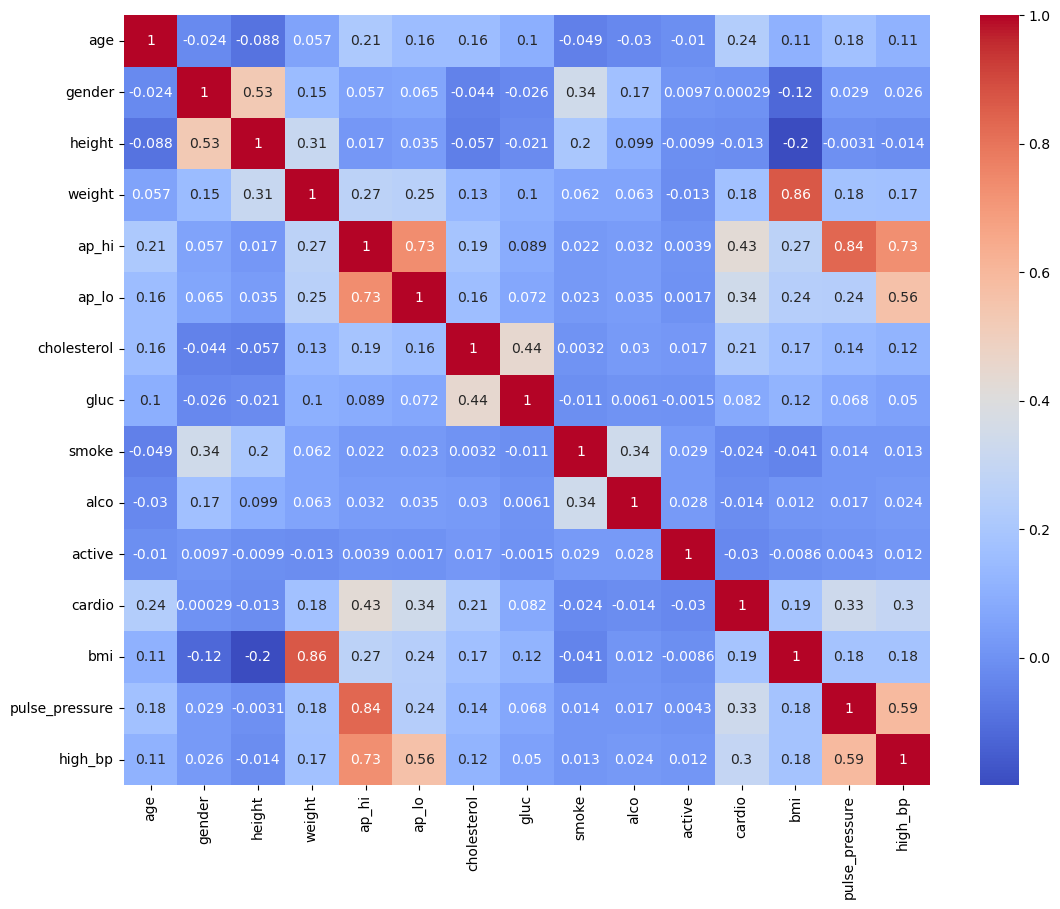

In [16]:
plt.figure(figsize=(13, 10)) 
sns.heatmap(corr, annot=True, cmap="coolwarm")

plt.show()

In [17]:
corr["cardio"].sort_values(ascending=False)

cardio            1.000000
ap_hi             0.426879
ap_lo             0.341706
pulse_pressure    0.333863
high_bp           0.296632
age               0.236675
cholesterol       0.214033
bmi               0.186872
weight            0.175060
gluc              0.081613
gender            0.000291
height           -0.012571
alco             -0.014309
smoke            -0.024083
active           -0.029794
Name: cardio, dtype: float64

In [18]:
df.shape

(65259, 15)

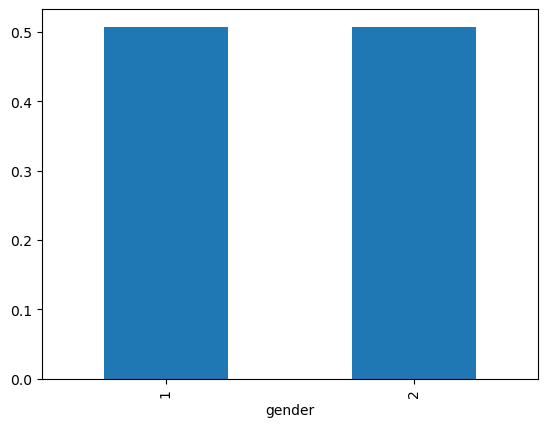

In [19]:
df.groupby('gender')['cardio'].mean().plot(kind='bar')
plt.show()

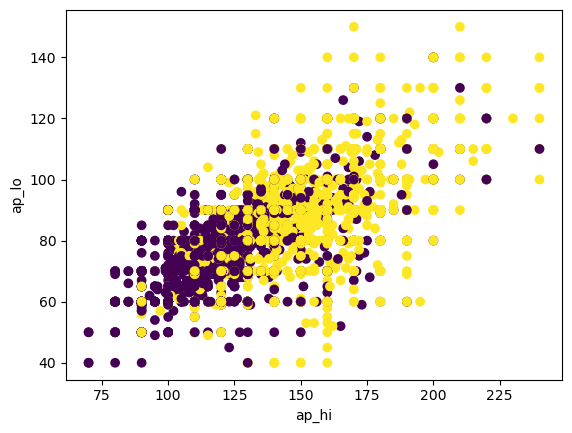

In [20]:
plt.scatter(df['ap_hi'], df['ap_lo'], c=df['cardio'])
plt.xlabel('ap_hi')
plt.ylabel('ap_lo')
plt.show()

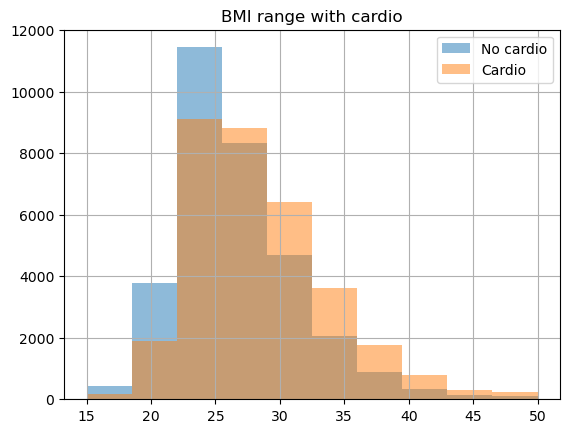

In [21]:
df[df['cardio']==0]['bmi'].hist(alpha=0.5, label='No cardio')
df[df['cardio']==1]['bmi'].hist(alpha=0.5, label='Cardio')
plt.title("BMI range with cardio")
plt.legend()
plt.show()

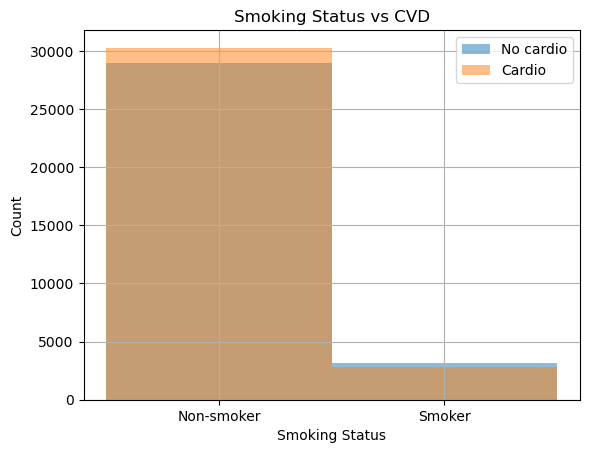

In [22]:
df[df['cardio']==0]['smoke'].hist(bins=[-0.5,0.5,1.5], alpha=0.5, label='No cardio')
df[df['cardio']==1]['smoke'].hist(bins=[-0.5,0.5,1.5], alpha=0.5, label='Cardio')
plt.xticks([0,1], ['Non-smoker','Smoker'])
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.title("Smoking Status vs CVD")
plt.legend()
plt.show()

In [23]:
smoke_counts = df.groupby(['cardio', 'smoke']).size()
print(smoke_counts)

cardio  smoke
0       0        28969
        1         3191
1       0        30276
        1         2823
dtype: int64


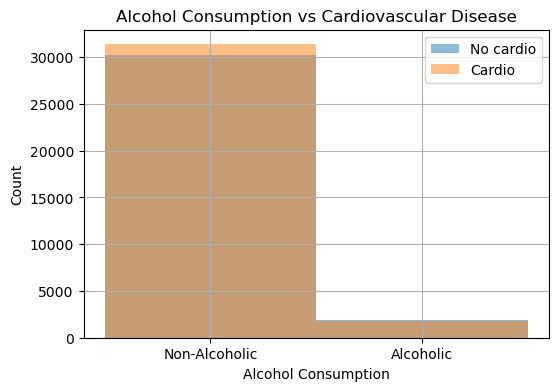

In [24]:
plt.figure(figsize=(6,4))
df[df['cardio']==0]['alco'].hist(bins=[-0.5,0.5,1.5], alpha=0.5, label='No cardio')
df[df['cardio']==1]['alco'].hist(bins=[-0.5,0.5,1.5], alpha=0.5, label='Cardio')
plt.xticks([0,1], ['Non-Alcoholic','Alcoholic'])
plt.xlabel("Alcohol Consumption")
plt.ylabel("Count")
plt.title("Alcohol Consumption vs Cardiovascular Disease")
plt.legend()
plt.show()

In [25]:
alco_counts = df.groupby(['cardio', 'alco']).size()
print(alco_counts)

cardio  alco
0       0       30255
        1        1905
1       0       31356
        1        1743
dtype: int64


In [26]:
df = df.drop(['height','weight'], axis=1 ,errors='ignore')

In [27]:
X = df.drop("cardio", axis=1)
Y = df["cardio"]

# Do we need SMOTE for Inbalanced Data

In [28]:
print(Y.value_counts())

cardio
1    33099
0    32160
Name: count, dtype: int64


In [29]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix

# GaussianNaiveBayes

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
gnb_model = GaussianNB()

In [32]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(gnb_model, X, Y, cv=kf, scoring='accuracy')

print("Accuracy in each fold:", scores)
print("Mean accuracy:", scores.mean())
print("Std deviation:", scores.std())

Accuracy in each fold: [0.69307386 0.69966289 0.69889672 0.69920319 0.69537236 0.69935642
 0.70196139 0.70349372 0.69491266 0.69808429]
Mean accuracy: 0.69840174815034
Std deviation: 0.003030288717705742


In [33]:
gnb_model.fit(X,Y)

GaussianNB()

# RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf_model = RandomForestClassifier(n_estimators=300, random_state=67)

In [36]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf_model,X,Y,cv=kf,scoring='accuracy',n_jobs=-1)

print("Accuracy in each fold:", scores)
print("Mean accuracy:", scores.mean())
print("Std deviation:", scores.std())

Accuracy in each fold: [0.66212075 0.66687098 0.66809684 0.65844315 0.65491879 0.67376647
 0.67637144 0.66579835 0.66595158 0.65716475]
Mean accuracy: 0.664950308990974
Std deviation: 0.006596015108419118


In [37]:
rf_model.fit(X,Y)

RandomForestClassifier(n_estimators=300, random_state=67)

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr_model = LogisticRegression( max_iter=5000)

In [40]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lr_model, X, Y, cv=kf, scoring='accuracy',n_jobs=-1 )

print("Accuracy in each fold:", scores)
print("Mean accuracy:", scores.mean())
print("Std deviation:", scores.std())

Accuracy in each fold: [0.7246399  0.72433344 0.72571253 0.72387374 0.71912351 0.73092246
 0.72249464 0.72724487 0.72816427 0.71954023]
Mean accuracy: 0.7246049577111536
Std deviation: 0.003486205286483486


In [41]:
lr_model.fit(X,Y)

LogisticRegression(max_iter=5000)

# DecisionTreeClassifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dt_model = DecisionTreeClassifier(
    max_depth=5,   
    random_state=21
)

In [44]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(dt_model, X, Y, cv=kf, scoring='accuracy',n_jobs=-1 )

print("Accuracy in each fold:", scores)
print("Mean accuracy:", scores.mean())
print("Std deviation:", scores.std())

Accuracy in each fold: [0.72218817 0.72525283 0.7246399  0.72893043 0.72387374 0.73659209
 0.73122893 0.73429359 0.73138216 0.72337165]
Mean accuracy: 0.7281753504696218
Std deviation: 0.00476360044129018


In [45]:
dt_model.fit(X,Y)

DecisionTreeClassifier(max_depth=5, random_state=21)

# GradientBoostingClassifier

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
gb_model = GradientBoostingClassifier(    
    max_depth=5,   
    random_state=17
)


In [48]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(gb_model, X, Y, cv=kf, scoring='accuracy',n_jobs=-1 )

print("Accuracy in each fold:", scores)
print("Mean accuracy:", scores.mean())
print("Std deviation:", scores.std())

Accuracy in each fold: [0.72663193 0.72954337 0.7301563  0.7301563  0.72632547 0.73735826
 0.73230156 0.73797119 0.73230156 0.72781609]
Mean accuracy: 0.7310562031273669
Std deviation: 0.00383399929103993


In [49]:
gb_model.fit(X,Y)

GradientBoostingClassifier(max_depth=5, random_state=17)

# Predictions

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('cardio_train.csv', sep=';')
df = df.drop(['id'], axis=1, errors='ignore')


In [51]:
df['age'] = np.ceil(df['age'] / 365.25)
df['bmi'] = df['weight'] / ((df['height']/100)**2)
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']
df['high_bp'] = ((df['ap_hi'] > 140) | (df['ap_lo'] > 90)).astype(int)

In [52]:
df = df[
    (df['ap_hi'] >= 70) & (df['ap_hi'] <= 250) &
    (df['ap_lo'] >= 40) & (df['ap_lo'] <= 150) &
    (df['ap_hi'] > df['ap_lo'])
]

In [53]:
X = df.drop('cardio', axis=1)
y = df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier(max_depth=5, n_estimators=100, random_state=17))
])

In [55]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 GradientBoostingClassifier(max_depth=5, random_state=17))])

In [56]:
accuracy = model_pipeline.score(X_test, y_test)
print(f"Model accuracy on unseen test set: {accuracy:.4f}")

Model accuracy on unseen test set: 0.7300


In [57]:
joblib.dump(model_pipeline, 'cardio_model_pipeline.pkl')
print("Model exported as 'cardio_model_pipeline.pkl'")

Model exported as 'cardio_model_pipeline.pkl'


In [58]:
y_pred = model_pipeline.predict(X_test)
y_prob = model_pipeline.predict_proba(X_test)[:, 1]

In [59]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

In [60]:
metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred),
    "recall": recall_score(y_test, y_pred),
    "f1": f1_score(y_test, y_pred),
    "roc_auc": roc_auc_score(y_test, y_prob)
}
metrics

{'accuracy': 0.7300131061598951,
 'precision': 0.7432864450127877,
 'recall': 0.6886848341232228,
 'f1': 0.7149446494464945,
 'roc_auc': np.float64(0.7964726557356018)}

In [61]:
from sklearn.model_selection import cross_val_score

cv_auc = cross_val_score(
    model_pipeline,
    X,
    y,
    scoring="roc_auc",
    cv=5
)
cv_auc.mean(), cv_auc.std()



(np.float64(0.8014044945384067), np.float64(0.004356176402252931))

In [62]:
from datetime import datetime ,timezone
import json

In [63]:
def to_json_safe(obj):
    """Convert non-JSON-serializable objects to JSON-serializable formats."""
    if isinstance(obj, (str, int, float, bool)) or obj is None:
        return obj
    if isinstance(obj, (np.integer, np.floating)):
        return obj.item()
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    if isinstance(obj, datetime):
        return obj.isoformat()
    if isinstance(obj, dict):
        return {k: to_json_safe(v) for k, v in obj.items()}
    if isinstance(obj, list):
        return [to_json_safe(v) for v in obj]
    return str(obj)



In [66]:
gbr = model_pipeline.named_steps["classifier"]

experiment = {
    "model": {
        "name": gbr.__class__.__name__,
        "library": "scikit-learn",
        "trained_at": datetime.now(timezone.utc),
        "n_estimators": gbr.n_estimators,
        "learning_rate": gbr.learning_rate,
        "max_depth": gbr.max_depth
    },
    "hyperparameters": gbr.get_params(),
    "metrics": {
        "accuracy": metrics["accuracy"],
        "precision": metrics["precision"],
        "recall": metrics["recall"],
        "f1": metrics["f1"],
        "roc_auc": metrics["roc_auc"],
        "kfold": scores
    },
    "training": {
        "train_loss_per_iteration": gbr.train_score_,
        "n_iterations": len(gbr.train_score_)
    },
    "features": {
        "names": X.columns.tolist(),
        "importances": gbr.feature_importances_
    },
    "data": {
        "total_size":len(X),
        "train_size": len(X_train),
        "test_size": len(X_test),
        "n_features": X_train.shape[1]
    },
    "predictions_sample": {
        "y_true": y_test.iloc[:50].tolist(),
        "y_pred": y_pred[:50].tolist()
    }
}


In [67]:
with open("model-info.json", "w") as f:
    json.dump(experiment, f, default=to_json_safe, indent=4)